## functions in util module

In [1]:
# merging new's (movieID, title) with old's title so that detailed roles (crew information which old data seem to have??) can be added.
# cinemagoer can be used for teh new's template ia.getmovieID()?

In [1]:
import os
import string
import pandas as pd
from src.match_format import set_dir_moviedata
from src.join_filter import movie, person, movie_person, join_movie, filter_year
from src.check_consistent import print_shape, multi_col_unique, movie_compare
import numpy as np
from imdb import Cinemagoer
# import os
# os.chdir(os.getcwd() + "/data/movie")
# test data: old_movie = pd.read_pickle('data/movie/old_movie.pkl')
set_dir_moviedata()

In [143]:
_ih[-100:]

["#filter_year(mi, 2000)\nmi_1 = mi.loc[:, 'year' == 2000]",
 '#filter_year(mi, 2000)\nmi_1 = mi.[mi.year == 2000]',
 '#filter_year(mi, 2000)\nmi_1 = mi[mi.year == 2000]',
 'mo_lang',
 'a = "Livet på en pinne"\nif reg.match(a):\n    print("yes")',
 'reg',
 'def is_english(word):\n    eng_charc = f"{string.ascii_lowercase + string.ascii_uppercase}" + " 0123456789" + "!@#$%&*()/?+"\n    return len(set([i for i in word] + [e for e in eng_charc])) == 52 + 10 + 12\nis_english(a)',
 'a = "Cristián Campos"\nif reg.match(a):\n    print("yes")',
 'def is_english(word):\n    eng_charc = f"{string.ascii_lowercase + string.ascii_uppercase}" + " 0123456789" + "!@#$%&*()/?+"\n    return len(set([i for i in word] + [e for e in eng_charc])) == 52 + 10 + 12\nis_english(a)',
 'def is_english(word):\n    eng_charc = f"{string.ascii_lowercase + string.ascii_uppercase}" + " 0123456789" + "!@#$%&*()/?+"\n    return len(set([i for i in word] + [e for e in eng_charc])) == 52 + 10 + 12\nis_english(a)',
 'a = "

In [141]:
is_english()

TypeError: is_english() missing 1 required positional argument: 'word'

## Movie titles
- what is in old but not in new
- what is in new but not in old
how to compare strings with string?

In [20]:
from langdetect import detect, DetectorFactory
DetectorFactory.seed = 0
# filter out pilot, finale titles, filter in region == us, type == movie
#movie()

In [3]:
old_movie = pd.read_pickle('old_movie_year_title.pkl')
new_movie = pd.read_pickle('new_movie_year_title_typemovie.pkl').drop(['region'], axis = 1)

In [16]:
print_shape(old_movie, new_movie)
new_movie

,titleId,title,year,titleType
20,tt0000009,Miss Jerry,1894,movie
1165,tt0000574,The Story of the Kelly Gang,1906,movie
1372,tt0000679,The Fairylogue and Radio-Plays,1908,movie
2104,tt0001038,Sherlock Holmes VI,1910,movie
2231,tt0001101,Abraham Lincoln's Clemency,1910,movie
...,...,...,...,...
11577017,tt9914642,Albatross,2017,movie
11577021,tt9914644,9/11: Escape from the Towers,2018,movie
11577123,tt9914828,The War of Godzilla,2015,movie
11577207,tt9914972,Blind Ambition,2021,movie


In [4]:
# make movie title and year as old_id
old_movie = multi_col_unique(old_movie)

# join and save result in mo, mi tsv
join_movie(old_movie, new_movie)

In [5]:
old_movie

,old_id,title,year
0,OLD0,Cristián Campos,2010
1,OLD1,Life & Death,2013
2,OLD2,Disguise for Murder,2001
3,OLD3,Anniversary,1971
4,OLD4,Angus Black/Lester Barrie/DC Curry,2009
...,...,...,...
2545514,OLD2417448,The Vanquished,1953
2545518,OLD2545518,V poiskakh kapitana Granta,1985
2545524,OLD1549795,Winterwatch,2012
2545525,OLD2545525,The Payoff,1942


In [100]:
mo = pd.read_csv("mo.tsv", sep='\t', low_memory = False, index_col='index') #pd.merge(old_movie, new_movie, on = ('title', 'year'), how = 'inner')
mi = pd.read_csv("mi.tsv", sep='\t', low_memory = False, index_col = 'old_id') #pd.merge(old_movie, new_movie, on = ('title', 'year'), how = 'outer')

In [101]:
mi #90k

,titleId,title,year
old_id,,,
OLD60,tt0808541,Winter,2006
OLD218,tt0970184,Operation Homecoming: Writing the Wartime Expe...,2007
OLD2120,tt1819776,Virus,2011
OLD2185,tt1564349,Dolphin Tale,2011
OLD2216,tt2133340,The Foreigner,2011
...,...,...,...
OLD2544715,tt0097994,Nobody's Perfect,1990
OLD2544825,tt0034166,Secret of the Wastelands,1941
OLD2544845,tt0021078,Little Accident,1930


In [102]:
mi_drop = mi.reset_index().drop_duplicates('old_id')
print(mi.shape[0] - mi_drop.shape[0])

402


In [2]:
# new_columns = ['titleId', 'title', 'year', 'region', 'titleType']
# new_movie_raw = pd.read_pickle('new_movie.pkl').loc[:, new_columns]
# new_movie_raw = filter_year(new_movie_raw, is_old = False)
# mo_type = pd.merge(old_movie, new_movie_raw, on=('title', 'year'), how='outer') # 2m
# mo_type.drop_duplicates('old_id', inplace=True)
#mo_type.to_pickle("mo_type.pkl")
mo_type = pd.read_pickle("mo_type.pkl")
mo_type = mo_type.loc[:, ('old_id', 'titleType')]
mo = pd.read_csv("mo.tsv", sep = '\t')
mi = pd.read_csv("mi.tsv", sep = '\t')
old_only = mo[mo.titleId.isnull()]
new_only = mo[mo.old_id.isnull()]
old_only_2000 = old_only[old_only.year == 2000]

In [79]:
mo_lang = pd.merge(old_only, mo.loc[:, ['old_id', 'lang']], on = 'old_id')
mo_lang_type = pd.merge(mo_lang, mo_type, on = 'old_id')

In [93]:
old_only_movie = mo_lang_type[(mo_lang_type.titleType == 'movie')& (mo_lang_type.lang == True)]

In [118]:
old_only_movie

,index,old_id,title,year,titleId,lang,titleType
153,155,OLD270,Love Is in the Air,2004,NaN,True,movie
783,785,OLD1346,Corazones rotos,2001,NaN,True,movie
1704,1713,OLD2963,Elle,1995,NaN,True,movie
3064,3076,OLD5381,In the Beginning,1985,NaN,True,movie
3737,3756,OLD6567,A Life,2008,NaN,True,movie
...,...,...,...,...,...,...,...
1611278,1704556,OLD2544727,Night Friend,1987,NaN,True,movie
1611319,1704597,OLD2544809,Razzia sur la chnouf,1955,NaN,True,movie
1611378,1704659,OLD2545058,Sky West and Crooked,1966,NaN,True,movie
1611408,1704689,OLD2545157,Terror! Il castello delle donne maledette,1974,NaN,True,movie


<AxesSubplot: >

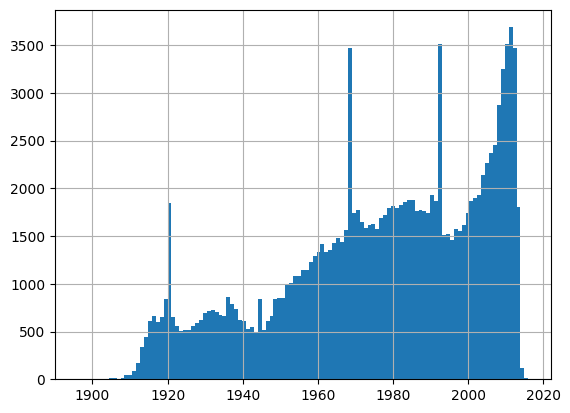

In [112]:
old_only_movie.year.hist(bins = len(old_only_movie.year.unique()))

What happened in peaks 1990, 1984, 1968, 1991,

In [130]:
old_only_movie.groupby('year').count().sort_values(by = 'index',ascending=False)

,index,old_id,title,titleId,lang,titleType
year,,,,,,
2011,3687,3687,3687,0,3687,3687
2010,3507,3507,3507,0,3507,3507
2012,3471,3471,3471,0,3471,3471
2009,3252,3252,3252,0,3252,3252
2008,2869,2869,2869,0,2869,2869
...,...,...,...,...,...,...
1907,7,7,7,0,7,7
1898,3,3,3,0,3,3
1896,1,1,1,0,1,1


In [131]:
old_only = dict()
for year in [1990, 1984, 1968, 1991]:
   old_only[year] =old_only_movie[old_only_movie.year ==year]

In [135]:
old_only[1990]

,index,old_id,title,year,titleId,lang,titleType
123788,124522,OLD226370,Thick as Thieves,1990,NaN,True,movie
124052,124790,OLD226922,Temptation,1990,NaN,True,movie
148595,149506,OLD282383,Countdown,1990,NaN,True,movie
206022,207236,OLD389111,After Midnight,1990,NaN,True,movie
232610,233959,OLD448413,Crisis,1990,NaN,True,movie
...,...,...,...,...,...,...,...
1609671,1702817,OLD2541637,Winckelmanns Reisen,1990,NaN,True,movie
1609853,1703017,OLD2541847,Wu niu,1990,NaN,True,movie
1610233,1703432,OLD2542286,Weiningers Nacht,1990,NaN,True,movie
1610569,1703813,OLD2542690,Yamadharma Raju,1990,NaN,True,movie


In [120]:
old_only[1984]

,index,old_id,title,year,titleId,lang,titleType
48594,48852,OLD87184,William Shakespeare,2000,NaN,True,movie
54712,54996,OLD98287,A Death in the Family,2000,NaN,True,movie
69311,69688,OLD124444,Moving On,2000,NaN,True,movie
69421,69798,OLD124635,Joker,2000,NaN,True,movie
81454,81907,OLD145821,Max,2000,NaN,True,movie
...,...,...,...,...,...,...,...
1608153,1701149,OLD2539892,Xiao Li fei dao zi Fei dao wai chuan,2000,NaN,True,movie
1608885,1701958,OLD2540739,Wang shang guai tan,2000,NaN,True,movie
1608957,1702035,OLD2540819,Zhi,2000,NaN,True,movie
1609110,1702203,OLD2540994,Zavist bogov,2000,NaN,True,movie


In [136]:
old_only[1968]

,index,old_id,title,year,titleId,lang,titleType
286100,287784,OLD556195,Hana no koibitotachi,1968,NaN,True,movie
435353,437794,OLD842068,Mariana,1968,NaN,True,movie
457356,459924,OLD882019,The Mercenaries,1968,NaN,True,movie
502646,505399,OLD966548,Still a Brother,1968,NaN,True,movie
712408,716075,OLD1367908,Revenge,1968,NaN,True,movie
...,...,...,...,...,...,...,...
1608659,1701711,OLD2540481,Yukcheui kil,1968,NaN,True,movie
1608751,1701815,OLD2540589,Zuckerbrot und Peitsche,1968,NaN,True,movie
1609675,1702821,OLD2541641,Yan nu,1968,NaN,True,movie
1609831,1702994,OLD2541823,Yabu no naka no kuroneko,1968,NaN,True,movie


In [138]:
detect("Anajigoku") #Swahili

'sw'

In [139]:
detect?

In [ ]:
old_only_movie_10
# includes 아저씨, the man from nowhere 2010, 2011
ia = Cinemagoer()
ia.get_movie('1527788')

In [117]:

# people = ia.search_person('Mel Gibson')
# for person in people:
#    print(person.personID, person['name'])
# person = ia.get_person('0000206')
# print(person)

<Movie id:1527788[http] title:_The Man from Nowhere (2010)_>

In [46]:
#filter_year(mi, 2000)
mi_1 = mi[mi.year == 2000]

In [ ]:
old_movie_lang = mo.loc[:, ['old_id', 'lang']]

 join genre index to old movies using joining with new movie

In [35]:
old_only

,index,old_id,title,year,titleId
0,0,OLD0,Cristián Campos,2010,NaN
1,1,OLD1,Life & Death,2013,NaN
2,2,OLD2,Disguise for Murder,2001,NaN
3,3,OLD3,Anniversary,1971,NaN
4,4,OLD4,Angus Black/Lester Barrie/DC Curry,2009,NaN
...,...,...,...,...,...
1704815,1704815,OLD2545510,The Second Part of Henry the Sixt,1983,NaN
1704816,1704816,OLD2545513,Western Spaghetti,2009,NaN
1704817,1704817,OLD2545518,V poiskakh kapitana Granta,1985,NaN
1704818,1704818,OLD2545525,The Payoff,1942,NaN


In [39]:
new_only #75k

,titleId,old_id,title,year


In [37]:
new_only[new_only.year == 2000]
#old_only[old_only.year == 2000]

,titleId,old_id,title,year


In [36]:
mi[mi.year == 2000]

,titleId,old_id,title,year
31,tt0176783,OLD10732,Gossip,2000
32,tt0238251,OLD10732,Gossip,2000
102,tt0242337,OLD32744,Bunny,2000
211,tt0241297,OLD71971,Chaos Theory,2000
259,tt0194410,OLD87714,The Stray,2000
...,...,...,...,...
92952,tt0205526,OLD2539423,Wildflower,2000
92987,tt2307054,OLD2539820,Watch,2000
93151,tt0215366,OLD2541710,Written in Water,2000
93187,tt0293706,OLD2542161,Who Owns the Past?,2000


## Person

In [9]:
new_person = person()

In [15]:
old_person

,id,name,imdbIndex,imdbId,gender,namePcodeCf,namePcodeNf,surnamePcode,md5sum
0,451,"A., David",NaN,NaN,m,A313,D13,A,cf45e7b42fbc800c61462988ad1156d2
1,129,"-Alverio, Esteban Rodriguez",NaN,NaN,m,A4162,E2315,A416,f5c410bff6839b545d04c531f776e8f2
2,1688,"Abbas, Athar",NaN,NaN,m,A1236,A3612,A12,cf230f6ed718a330dc688c20b8d741d3
3,3631,"Aberer, Leo",NaN,NaN,m,A164,L16,A16,05684f16b84db387e613d3de57eca5b7
4,512,A.J.,II,NaN,m,A2,NaN,NaN,c63baf59b537e471b6ec4b68c5d1373e
...,...,...,...,...,...,...,...,...,...
4193671,4193674,"Öndemir, Önder",NaN,NaN,NaN,N3565,N3653,N356,4aaaea8e689c667e6f34023f16db5481
4193672,4193676,"Özgür, Lale",NaN,NaN,NaN,Z264,L426,Z26,0b7c397c3605fdc0afbf8220061c1579
4193673,4193670,"Ôta, Akemi",NaN,NaN,NaN,T25,A253,T,ce24ccbc6f95737710b925cd66722d06
4193674,4193675,"Östling, Kia",NaN,NaN,NaN,S3452,K2345,NaN,8c8b06b41b1639845317b12613b0a95b


In [12]:
pmc_raw

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles,tconst,ordering,category,job,characters
0,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0072308,tt0053137,tt0050419,tt0031983",tt0025164,1,actor,\N,"[""Guy Holden""]"
1,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0072308,tt0053137,tt0050419,tt0031983",tt0026942,2,actor,\N,"[""Huck Haines""]"
2,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0072308,tt0053137,tt0050419,tt0031983",tt0027125,1,actor,\N,"[""Jerry Travers""]"
3,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0072308,tt0053137,tt0050419,tt0031983",tt0027630,1,actor,\N,"[""Bake Baker""]"
4,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0072308,tt0053137,tt0050419,tt0031983",tt0028333,1,actor,\N,"[""Lucky Garnett""]"
...,...,...,...,...,...,...,...,...,...,...,...
52467457,nm9993713,Sambit Mishra,\N,\N,"writer,producer","tt15134202,tt10449366,tt10709066,tt21147342",tt15186906,6,writer,\N,\N
52467458,nm9993713,Sambit Mishra,\N,\N,"writer,producer","tt15134202,tt10449366,tt10709066,tt21147342",tt15187068,6,writer,\N,\N
52467459,nm9993713,Sambit Mishra,\N,\N,"writer,producer","tt15134202,tt10449366,tt10709066,tt21147342",tt15204446,6,writer,\N,\N
52467460,nm9993717,Harikrishnan Rajan,\N,\N,cinematographer,tt8736744,tt8736744,7,cinematographer,\N,\N


In [22]:
pmc.

,tconst,ordering,nconst,category,job,characters
0,tt0000001,1,nm1588970,self,\N,"[""Self""]"
1,tt0000001,2,nm0005690,director,\N,\N
2,tt0000001,3,nm0374658,cinematographer,director of photography,\N
3,tt0000002,1,nm0721526,director,\N,\N
4,tt0000002,2,nm1335271,composer,\N,\N
...,...,...,...,...,...,...
52475552,tt9916880,4,nm10535738,actress,\N,"[""Horrid Henry""]"
52475553,tt9916880,5,nm0996406,director,principal director,\N
52475554,tt9916880,6,nm1482639,writer,\N,\N
52475555,tt9916880,7,nm2586970,writer,books,\N


In [27]:
pmc

,nconst,tconst,category,characters
0,nm0000001,tt0025164,actor,"[""Guy Holden""]"
1,nm0000001,tt0026942,actor,"[""Huck Haines""]"
2,nm0000001,tt0027125,actor,"[""Jerry Travers""]"
3,nm0000001,tt0027630,actor,"[""Bake Baker""]"
4,nm0000001,tt0028333,actor,"[""Lucky Garnett""]"
...,...,...,...,...
52467412,nm9993708,tt14508814,actress,"[""Extra""]"
52467415,nm9993708,tt21028920,actress,\N
52467420,nm9993709,tt11702702,actress,"[""Observant Poet""]"
52467423,nm9993709,tt11772842,actress,"[""Lu""]"


In [104]:


old_person.columns = ['id', 'personID','infoTypeID','info', 'note']

In [109]:
old_person = pd.read_pickle("old_person.pkl")
#new_person = pd.read_pickle('new_person_basics.p6yhn     kl')

In [9]:
new_person_movie = pd.read_pickle('test.pkl')

FileNotFoundError: [Errno 2] No such file or directory: 'test.pkl'

In [22]:
os.getcwd()

'/Users/hyunjimoon/Dropbox/tolzul/BayesSD/ContinuousCode/3_Data4DM/empirical_dynamics/cont_code/data/movie'

In [18]:
old_person.columns = ['id', 'name', 'imdbIndex', 'imdbId', 'gender', 'namePcodeCf', 'namePcodeNf', 'surnamePcode', 'md5sum']
old_person[['id', 'name']] #4m

,id,name
0,451,"A., David"
1,129,"-Alverio, Esteban Rodriguez"
2,1688,"Abbas, Athar"
3,3631,"Aberer, Leo"
4,512,A.J.
...,...,...
4193671,4193674,"Öndemir, Önder"
4193672,4193676,"Özgür, Lale"
4193673,4193670,"Ôta, Akemi"
4193674,4193675,"Östling, Kia"


In [10]:
pd.read_csv("cast_info.csv").to_pickle("old_cast_info.pkl")

FileNotFoundError: [Errno 2] No such file or directory: 'cast_info.csv'

In [1]:
pd.read_csv("data/movie/new_movie_princ.pkl")

NameError: name 'pd' is not defined

In [19]:
new_person.rename(columns = {'primaryName': 'name', 'birthYear': 'year'}, inplace=True)

In [20]:
new_person

,nconst,name,year,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0072308,tt0053137,tt0050419,tt0031983"
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack","tt0038355,tt0037382,tt0117057,tt0071877"
2,nm0000003,Brigitte Bardot,1934,\N,"actress,soundtrack,music_department","tt0054452,tt0057345,tt0056404,tt0049189"
3,nm0000004,John Belushi,1949,1982,"actor,soundtrack,writer","tt0078723,tt0072562,tt0080455,tt0077975"
4,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0083922,tt0050986,tt0069467,tt0060827"
...,...,...,...,...,...,...
11988018,nm9993714,Romeo del Rosario,\N,\N,"animation_department,art_department","tt2455546,tt11657662,tt14069590"
11988019,nm9993716,Essias Loberg,\N,\N,NaN,\N
11988020,nm9993717,Harikrishnan Rajan,\N,\N,cinematographer,tt8736744
11988021,nm9993718,Aayush Nair,\N,\N,cinematographer,\N


## Cinemagoer

In [383]:
people = ia.search_person('Mel Gibson')
for person in people:
   print(person.personID, person['name'])
person = ia.get_person('0000206')
print(person)

0000154 Mel Gibson
12550288 Mel Gibson
2153167 Mel Gibson
0317112 Mel Gibson
3323885 Adam Taylor
2800055 Mel Gibson
3742421 Melina Mari Bryant   nickname
0317195 Terel Gibson
0316945 Donal Gibson
4047961 Noel Gibson
0316878 Cal Gibson
13996602 Joel Gibson
3912400 Jamel Gibson
2106809 Raquel Gibson
0316950 E.L. Gibson
12479102 Gel Gibson
2798174 Daniel Gibson
6928816 Christel Gibson
0316915 Daniel Gibson
1863978 Ethel Gibson
